#### 1. Me6

Root Mean Squared Error: 1.5372184141948206
R^2 Score: 0.7858284005171735
Mean Absolute Error: 1.0019308408328829


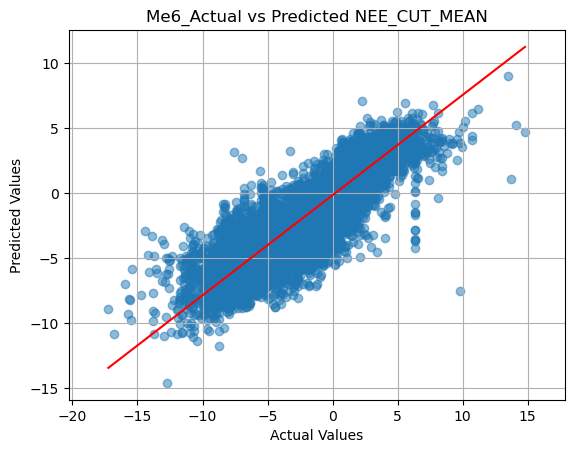

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the data
data_path = '/home/rstudio/EAEE4000_ML_for_Env_Eng_Sci/ClimateBench_tutorials/Me6_soil (1).csv'
data = pd.read_csv(data_path)

# Split data into features and labels
features = data[['TA_ERA', 'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA', 'PA_ERA', 'P_ERA', 'WS_ERA']]
labels = data['NEE_CUT_MEAN']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize Random Forest model and train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
predictions = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

# Visualization of results with fitted line
plt.scatter(y_test, predictions, alpha=0.5)
coefficients = np.polyfit(y_test, predictions, 1)
poly = np.poly1d(coefficients)
trendline = poly(np.unique(y_test))

plt.plot(np.unique(y_test), trendline, color='red')
plt.title('Me6_Actual vs Predicted NEE_CUT_MEAN')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.axis('equal')
plt.show()

#### 2. Me6_soil

Root Mean Squared Error: 1.2963556544988746
R^2 Score: 0.8476862690384519
Mean Absolute Error: 0.8107099368168784


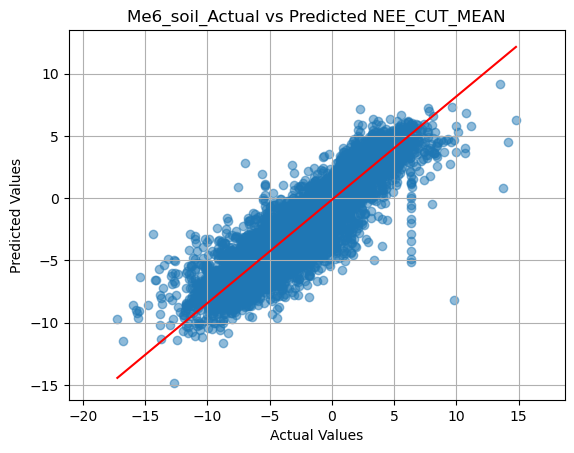

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Import necessary libraries
import shap

# Load the data
data_path = '/home/rstudio/EAEE4000_ML_for_Env_Eng_Sci/ClimateBench_tutorials/Me6_soil (1).csv'
data = pd.read_csv(data_path)

# Split data into features and labels
features = data[['TA_ERA', 'SW_IN_ERA', 'LW_IN_ERA', 'VPD_ERA', 'PA_ERA', 'P_ERA', 'WS_ERA', 'SWC_F_MDS_1', 'TS_F_MDS_1']]
labels = data['NEE_CUT_MEAN']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Initialize Random Forest model and train
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate the model
predictions = rf_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')
print(f'Mean Absolute Error: {mae}')

# Visualization of results with fitted line
plt.scatter(y_test, predictions, alpha=0.5)
coefficients = np.polyfit(y_test, predictions, 1)
poly = np.poly1d(coefficients)
trendline = poly(np.unique(y_test))

plt.plot(np.unique(y_test), trendline, color='red')
plt.title('Me6_soil_Actual vs Predicted NEE_CUT_MEAN')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.axis('equal')
plt.show()

# SHAP Value Calculation and Visualization
explainer = shap.Explainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Visualize the SHAP values - summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=features.columns)

calculate the contribution